Here we perform empirical dynamic modeling by explicitly computing the derivatives. The general outline is:
1. Prepare the dataset
2. Generate the training data
3. Train a model
4. Make predictions

In [1]:
import sys
sys.path.append("./source")
from train import *
from predict import *
from model import *
import pickle
import matplotlib.pyplot as plt

# 1. Data Preparation

First of all, let's load the data to see what we have

In [2]:
# load data
with open('./data/cell_cycle.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    
data_array = data_dict['data']
time_points = data_dict['t']
print(data_array)

tf.Tensor(
[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [1.8574454e-01 8.7654376e-03 5.9512700e-04 ... 6.0092352e-06
   9.7030962e-01 9.9376065e-01]
  [3.4569421e-01 3.0824989e-02 4.2587179e-03 ... 4.3429980e-05
   9.4068259e-01 9.9145037e-01]
  ...
  [2.0090375e+00 4.0701852e+00 5.9606433e+00 ... 3.6492196e-01
   1.1248062e-02 1.2336582e-01]
  [2.0141225e+00 4.1121426e+00 6.0291305e+00 ... 3.6592254e-01
   1.1488698e-02 1.2082905e-01]
  [2.0191867e+00 4.1546230e+00 6.0978069e+00 ... 3.6697137e-01
   1.1737520e-02 1.1835048e-01]]], shape=(1, 7500, 7), dtype=float32)


In [3]:
import pandas as pd

df = pd.DataFrame(data_array.numpy()[0])
df.columns = ['cyclin', 'MPF', 'preMPF', 'cdc25P', 'wee1P', 'IEP', 'APC']
df['Strain'] = [0] * df.shape[0]
df = df.set_index('Strain')
df.head()

,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC
Strain,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0,0.185745,0.008765,0.000595,0.000012,0.000006,0.970310,0.993761
0,0.345694,0.030825,0.004259,0.000085,0.000043,0.940683,0.991450
0,0.483463,0.061154,0.012881,0.000260,0.000133,0.911164,0.990087
0,0.602154,0.096144,0.027416,0.000560,0.000285,0.881781,0.989058


In [4]:
from generate_dataset import generate_dataset
feature_list = [] # here we do not have external time-series
target_list = ['cyclin', 'MPF', 'preMPF', 'cdc25P', 'wee1P', 'IEP', 'APC']

In [5]:
# add time_points to df
df['Time'] = time_points
df.head()

,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC,Time
Strain,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
0,0.185745,0.008765,0.000595,0.000012,0.000006,0.970310,0.993761,0.2
0,0.345694,0.030825,0.004259,0.000085,0.000043,0.940683,0.991450,0.4
0,0.483463,0.061154,0.012881,0.000260,0.000133,0.911164,0.990087,0.6
0,0.602154,0.096144,0.027416,0.000560,0.000285,0.881781,0.989058,0.8


In [6]:
#testing if it works
df_train = generate_dataset(df, [0],feature_list, target_list, n_dim=100)
display(df_train)

feature    target   feature    target    feature  \
                      cyclin    cyclin       MPF       MPF     preMPF   
Strain Time                                                             
0      0.000000     0.100544  0.083894 -1.486018  0.186644  -4.387189   
       15.149495    1.358783  0.070095  1.313275  0.166328   7.452861   
       30.298990    2.203110  0.042497  3.503171  0.125697  15.138556   
       45.448485    2.633525  0.008383  5.083668  0.115091  18.669897   
       60.597980    2.454577 -0.015550  6.955440  0.062448  18.712543   
...                      ...       ...       ...       ...        ...   
       1439.202020  1.891418  0.000775  5.436756  0.006237   5.484027   
       1454.351515  1.918933  0.001015  5.614956 -0.005976   5.809674   
       1469.501010  1.921852 -0.001105  5.257507 -0.033778   5.727933   
       1484.650505  1.885781 -0.003705  4.601759 -0.053667   5.229732   
       1499.800000  1.810722 -0.005005  3.647711 -0.063612   4.315072   

                      target   feature    target   feature    target  \
                      preMPF    cdc25P    cdc25P     wee1P     wee1P   
Strain Time                                                            
0      0.000000     0.789442  0.065211 -0.006997 -0.040572  0.006591   
       15.149495    0.650945 -0.039724  0.003262  0.058285  0.006850   
       30.298990    0.373951  0.163054  0.023779  0.164906  0.007368   
       45.448485    0.119149  0.673545  0.051605  0.279289  0.010007   
       60.597980   -0.166343  1.711005  0.067599  0.465073  0.008970   
...                      ...       ...       ...       ...       ...   
       1439.202020  0.008551  4.387443  0.000076  0.512721  0.000125   
       1454.351515  0.008131  4.394070 -0.002130  0.512443 -0.000857   
       1469.501010 -0.019334  4.323536 -0.004673  0.487024 -0.001768   
       1484.650505 -0.047102  4.253891 -0.004614  0.459424 -0.001913   
       1499.800000 -0.060985  4.185133 -0.004584  0.429645 -0.001986   

                     feature    target   feature    target  
                         IEP       IEP       APC       APC  
Strain Time                                                 
0      0.000000     0.710310 -0.024215  0.992269 -0.036571  
       15.149495    0.347129 -0.019555  0.443779 -0.029374  
       30.298990    0.123732 -0.010235  0.111170 -0.014980  
       45.448485    0.040118  0.006712 -0.005558  0.004070  
       60.597980    0.325060  0.011899  0.233257  0.015462  
...                      ...       ...       ...       ...  
       1439.202020  0.275165  0.000205  0.368212 -0.000445  
       1454.351515  0.214950 -0.003560  0.345822 -0.001684  
       1469.501010  0.168377 -0.002265  0.317684 -0.000917  
       1484.650505  0.146996 -0.000586  0.318323  0.001002  
       1499.800000  0.150807  0.000254  0.347741  0.001961  

[100 rows x 14 columns]

# 2. Training

In [7]:
# the features are the multi-dimensional time-series concentrations
# the target is the derivative of the dynamics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# TODO: create a random forest model with 20 estimators
rf_model = RandomForestRegressor(n_estimators=20)

# TODO: create a pipeline consisting of: standard scaling of the data + ridge regression
lr_model = Pipeline([('Scaler',StandardScaler()),
                            ('Linear Regressor',BaggingRegressor(base_estimator=Ridge(),
                                                                 n_estimators=20, max_samples=.8,
                                                                 bootstrap=False,
                                                                 bootstrap_features=False,
                                                                 random_state=None))])

# TODO: create a pipeline 
nn_model = Pipeline([('Scaler',StandardScaler()),
                            ('neural_net',MLPRegressor(hidden_layer_sizes=(10, 10, 10),
                                                       learning_rate_init=0.1,
                                                       learning_rate='adaptive',
                                                       solver='adam',
                                                       activation='tanh',
                                                       max_iter=1000))])

cyclin


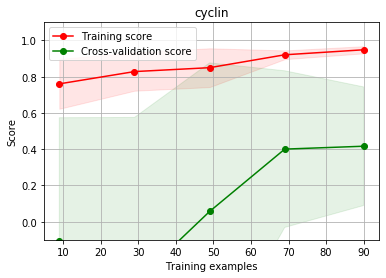

Target: cyclin, CV Pearson R2 coefficient: 0.929962
MPF


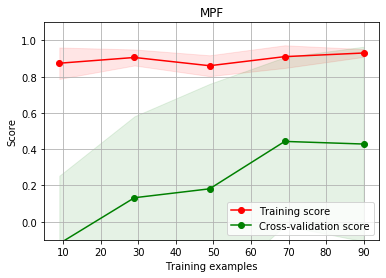

Target: MPF, CV Pearson R2 coefficient: 0.929136
preMPF


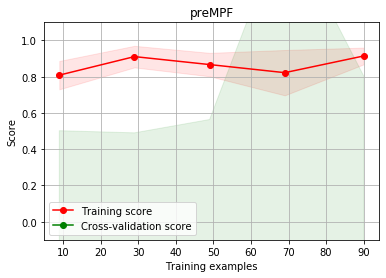

Target: preMPF, CV Pearson R2 coefficient: 0.950282
cdc25P


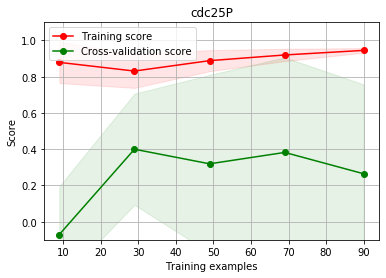

Target: cdc25P, CV Pearson R2 coefficient: 0.959412
wee1P


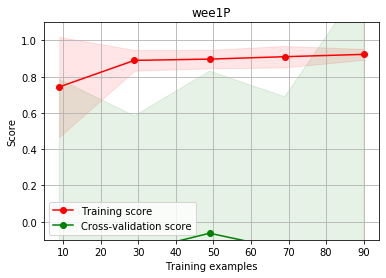

Target: wee1P, CV Pearson R2 coefficient: 0.960898
IEP


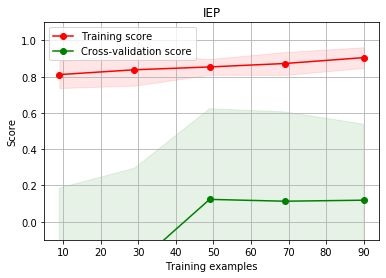

Target: IEP, CV Pearson R2 coefficient: 0.930151
APC


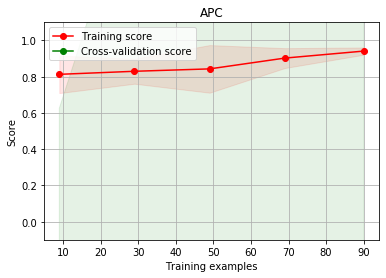

Target: APC, CV Pearson R2 coefficient: 0.932568
Average training score: 0.9417729570010364


In [8]:
## write a function that performs training
from sklearn.base import clone
from sklearn.model_selection import ShuffleSplit
from train_classic import train_classic

figure_path = './plots/'

# train a model
model_type = 'random_forest'
rf_dict, score_dict = train_classic(df_train, rf_model, plot=True,model_type=model_type, figure_path=figure_path) # YOUR CODE HERE

cyclin RMSE: -0.00010546124151740768 standard deviation: 0.0031699494632040437


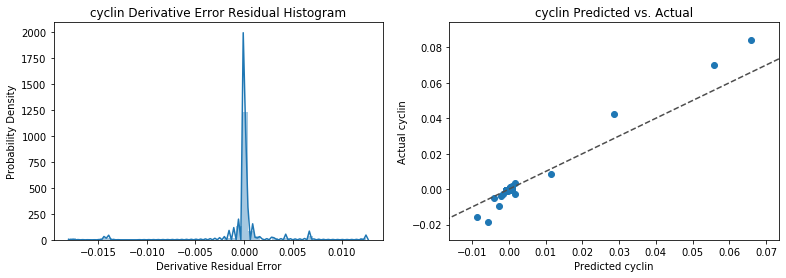

MPF RMSE: -0.0006973620376020134 standard deviation: 0.0088873594255866


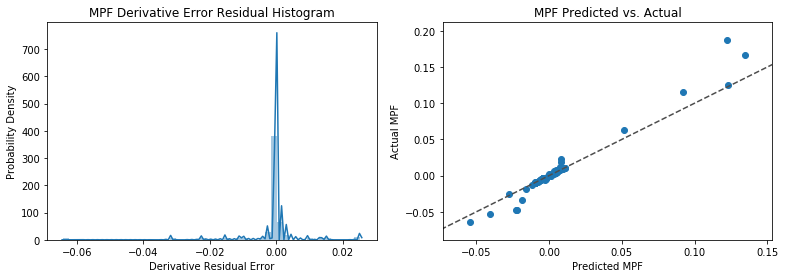

preMPF RMSE: 6.504154813961077e-05 standard deviation: 0.026879742401445212


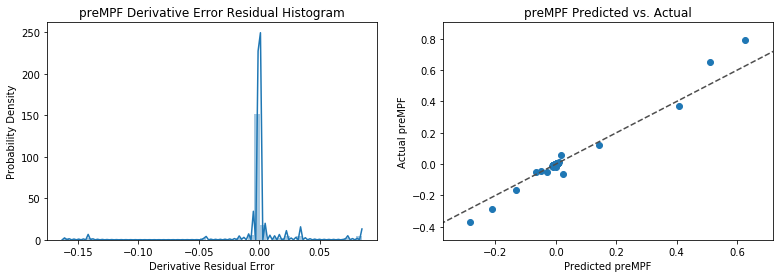

cdc25P RMSE: -9.739063169122517e-05 standard deviation: 0.0021704219459117166


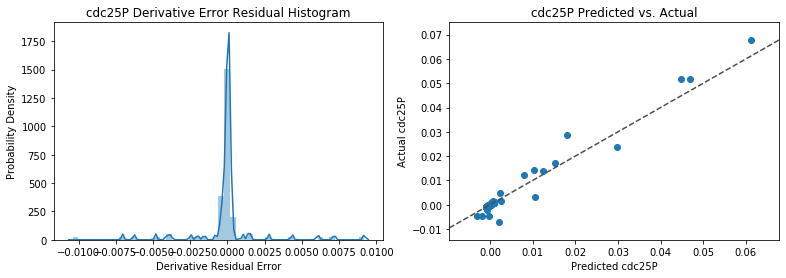

wee1P RMSE: -4.412363718327958e-05 standard deviation: 0.0003661802007079208


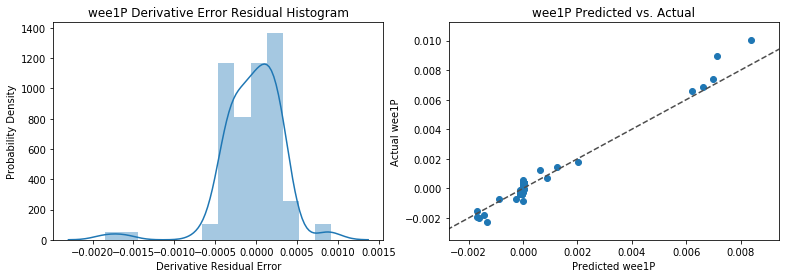

IEP RMSE: 3.359950566778477e-05 standard deviation: 0.0009836556544945134


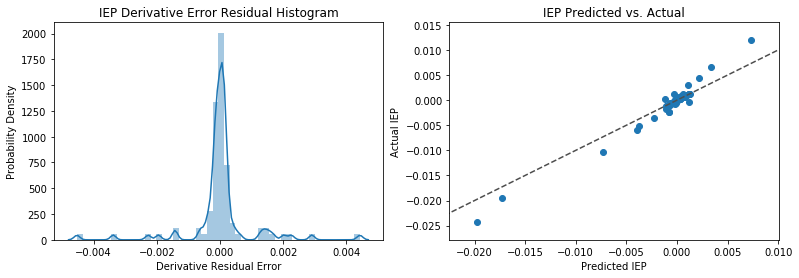

APC RMSE: 2.73733722259742e-05 standard deviation: 0.0013822474996855706


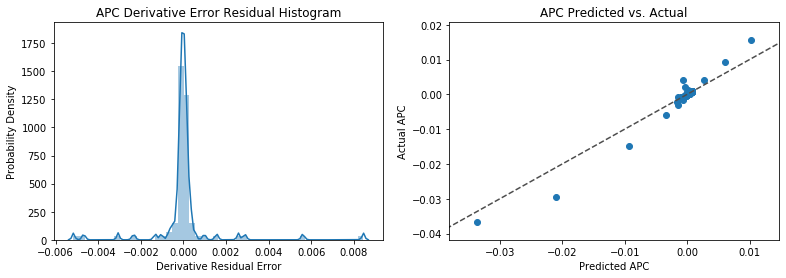

Total Derivative Mean Error: 0.8700431150774183 Error Standard Deviation: 0.025073083811603985


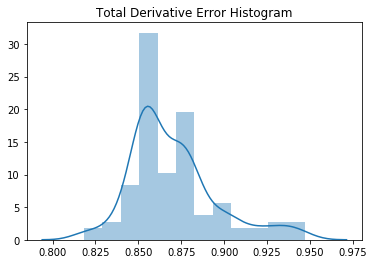

In [9]:
from compute_error import compute_error

# compute the error
compute_error(df_train,rf_dict,plot=True,model_type=model_type)

In [10]:
# now we make predictions via numerical integration
# note that in predict_integrate, the function expects a normal dataframe and not the time-series multi-index dataframe
from predict_classic import predict_integrate

predict_integrate(df, df, rf_dict, target_list, feature_list, title='cell cycle', plot=True,model_type=model_type)

Real data:


,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC
Strain,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0,0.185745,0.008765,0.000595,0.000012,0.000006,0.970310,0.993761
0,0.345694,0.030825,0.004259,0.000085,0.000043,0.940683,0.991450
0,0.483463,0.061154,0.012881,0.000260,0.000133,0.911164,0.990087
0,0.602154,0.096144,0.027416,0.000560,0.000285,0.881781,0.989058
...,...,...,...,...,...,...,...
0,1.998806,3.987818,5.824301,3.937864,0.363066,0.010790,0.128617
0,2.003932,4.028746,5.892361,3.936569,0.363970,0.011015,0.125962
0,2.009037,4.070185,5.960643,3.935427,0.364922,0.011248,0.123366


Predicted data:


,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC
Time,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0.2,0.013073,0.024313,0.123956,0.000513,0.001242,0.995903,0.993549
0.4,0.026146,0.048627,0.247912,0.001026,0.002485,0.991807,0.987099
0.6,0.039219,0.072940,0.371868,0.001538,0.003727,0.987710,0.980648
0.8,0.051445,0.097253,0.495824,0.002225,0.004969,0.983613,0.974198
...,...,...,...,...,...,...,...
1499.0,2.309332,3.574424,6.723986,35.379347,1.996079,0.524022,0.024849
1499.2,2.310376,3.575025,6.732172,35.381817,1.996451,0.523693,0.024780
1499.4,2.311097,3.574833,6.735967,35.384287,1.996824,0.523720,0.024813


NameError: name 'interp1d' is not defined

In [ ]:
value = bier[0.7]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

In [ ]:
value = bier[0.8]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

In [ ]:
value = bier[0.9]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

In [ ]:
value = bier[1.0]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

In [ ]:
value = bier[1.1]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

In [ ]:
value = bier[1.2]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

In [ ]:
# Phase plane

plt.plot(simulated_x[:,0], simulated_x[:,1], label='simulated_data')
plt.legend()
plt.plot(test_pred[:,0], test_pred[:,1], 'm+', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Cubic Harmonic Oscillator')